# Abell 85  -  SDSS spectra

Scripts to get list of galaxies in SDSS.

In [17]:
import numpy as np
import os    

ra0 = 10.4075
dec0 = -9.3425

dmax=-8.8
dmin=-10.4
amin=10.
amax=11.

ramin = str(amin)
ramax = str(amax)

n=5
diff = (dmax-dmin)/n
decmin=dmin+np.arange(n)*diff
decmax=diff+dmin+np.arange(n)*diff

#for idecmin, idecmax in zip(decmin, decmax):
#    string='"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+g.objid,g.ra,g.dec,g.u,g.Err_u,g.g,g.Err_g,g.r,g.Err_r,g.i,g.Err_i,g.z,g.Err_z+from+PhotoObj+AS+g+where+g.ra+between+'+str(ramin)+'+and+'+str(ramax)+'+and+g.dec+between+'+str(idecmin)+'+and+'+str(idecmax)+'+order+by+g.objid&format=csv"'
#    print(string)
#    os.system('wget -l 1 -o log -O - '+string+' | sed -e "s/,/  /g" -e "1d" >> A85_SDSS_photoz.ASC')

# Getting sources with redshift

outdir = '/media/Data/workspace/Clusters/A85/Spectra/SDSS/'
outfile = 'A85_SDSS_z.ASC'
fields = ['targetObjID','X_WORLD','Y_WORLD','z','zErr','Plate','FiberID']
text_file = open(outdir+outfile, "wt")
for i, field in enumerate(fields):
    text_file.write('# {:1d} '.format(i+1)+field+'\n')
text_file.close()

# tail -n +2   cuts the first line of output (name of the fields)

url = '"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&'
command = 'cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID+'
origin = 'from+SpecObj+as+s+'
condition = 'where+s.ra+between+'+ramin+'+and+'+ramax+'+and+s.dec+between+'+str(idecmin)+'+and+'+str(idecmax)
outformat = '+order+by+s.ra&format=csv"'

for idecmin, idecmax in zip(decmin, decmax):
    string = url+command+origin+condition+outformat
    print(string)
    os.system('wget -l 1 -o log -O - '+string+' | tail -n +2 | sed -e "s/,/  /g" -e "1d" >> '+outdir+outfile)


"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID+from+SpecObj+as+s+where+s.ra+between+10.0+and+11.0+and+s.dec+between+-9.120000000000001+and+-8.8+order+by+s.ra&format=csv"
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID+from+SpecObj+as+s+where+s.ra+between+10.0+and+11.0+and+s.dec+between+-9.120000000000001+and+-8.8+order+by+s.ra&format=csv"
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID+from+SpecObj+as+s+where+s.ra+between+10.0+and+11.0+and+s.dec+between+-9.120000000000001+and+-8.8+order+by+s.ra&format=csv"
"http://cas.sdss.org/dr16/en/to

In [36]:
# Cluster members with redshift and line intensities

url = '"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&'
command = 'cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,'
lines = 'e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity+'
origin = 'FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+'
origin += 'JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+'
condition = 'where+s.ra+between+'+ramin+'+and+'+ramax+'+and+s.dec+between+'+str(idecmin)+'+and+'+str(idecmax)+'+and+s.z+between+0.045+and+0.065'
outformat = '+order+by+s.ra&format=csv"'

outdir = '/media/Data/workspace/Clusters/A85/Spectra/SDSS/'
outfile = 'A85_SDSS_lines.ASC'
fields = ['targetObjID','X_WORLD','Y_WORLD','z','zErr','Plate','FiberID',
          'Hb4861 [10-17 ergs/cm2/s/A]','[OIII]5006 [10-17 ergs/cm2/s/A]',
          'Ha6562 [10-17 ergs/cm2/s/A]','[NII]6583 [10-17 ergs/cm2/s/A]',
         'StellarMass [dex solar mass]','Metallicity']
text_file = open(outdir+outfile, "wt")
for i, field in enumerate(fields):
    text_file.write('# {:1d} '.format(i+1)+field+'\n')
text_file.close()

for idecmin, idecmax in zip(decmin, decmax):
    string = url+command+lines+origin+condition+outformat
    print(string)
    os.system('wget -l 1 -o log -O - '+string+' | tail -n +2 | sed -e "s/,/  /g" -e "1d" >> '+outdir+outfile)


"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+where+s.ra+between+10.0+and+11.0+and+s.dec+between+-9.120000000000001+and+-8.8+and+s.z+between+0.045+and+0.065+order+by+s.ra&format=csv"
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+where+s

## Lines & masses for all SDSS

In [129]:
dmax=90
dmin=-90

n=10
diff = (dmax-dmin)/n
decmin=dmin+np.arange(n)*diff
decmax=diff+dmin+np.arange(n)*diff

url = '"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&'
command = 'cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,'
lines = 'e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity,s.class,s.targetType+'
origin = 'FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+'
origin += 'JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+'
condition = 'where+s.dec+between+'+str(idecmin)
condition +='+and+'+str(idecmax)+'+and+s.z+between+0.0448+and+0.0627'
condition +='+and+e.Flux_Ha_6562>0+and+e.Flux_NII_6583>0'
outformat = '+order+by+s.ra&format=csv"'

outdir = '/media/Data/workspace/Clusters/A85/Spectra/SDSS/'
outfile = 'SDSS_lines.ASC'
fields = ['targetObjID','X_WORLD','Y_WORLD','z','zErr','Plate','FiberID',
          'Hb4861 [10-17 ergs/cm2/s/A]','[OIII]5006 [10-17 ergs/cm2/s/A]',
          'Ha6562 [10-17 ergs/cm2/s/A]','[NII]6583 [10-17 ergs/cm2/s/A]',
         'StellarMass [dex solar mass]','Metallicity','Class','Target']
text_file = open(outdir+outfile, "wt")
for i, field in enumerate(fields):
    text_file.write('# {:1d} '.format(i+1)+field+'\n')
text_file.close()

for idecmin, idecmax in zip(decmin, decmax):
    string = url+command+lines+origin+condition+outformat
    print(idecmin)
    print(string)
    os.system('wget -l 1 -o log -O - '+string+' | tail -n +2 | sed -e "s/,/  /g" -e "1d" >> '+outdir+outfile)


-90.0
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity,s.class,s.targetType+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+where+s.dec+between+72.0+and+90.0+and+s.z+between+0.0448+and+0.0627+and+e.Flux_Ha_6562>0+and+e.Flux_NII_6583>0+order+by+s.ra&format=csv"
-72.0
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity,s.class,s.targetType+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+JOIN+stellarMassSta

## Nearby galaxies

In [126]:
dmax=0
dmin=-90

n=10
diff = (dmax-dmin)/n
decmin=dmin+np.arange(n)*diff
decmax=diff+dmin+np.arange(n)*diff

url = '"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&'
command = 'cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,'
lines = 'e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity,s.class,s.targetType'
origin = '+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+'
origin += 'JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID'
condition = '+where+s.dec+between+'+str(idecmin)
condition +='+and+'+str(idecmax)+'+and+s.z+between+0.00+and+0.04'
condition +='+and+e.Flux_Ha_6562>0+and+e.Flux_NII_6583>0'
outformat = '+order+by+s.ra&format=csv"'

outdir = '/media/Data/workspace/Clusters/A85/Spectra/SDSS/'
outfile = 'SDSS_lowz_lines.ASC'
fields = ['targetObjID','X_WORLD','Y_WORLD','z','zErr','Plate','FiberID',
          'Hb4861 [10-17 ergs/cm2/s/A]','[OIII]5006 [10-17 ergs/cm2/s/A]',
          'Ha6562 [10-17 ergs/cm2/s/A]','[NII]6583 [10-17 ergs/cm2/s/A]',
         'StellarMass [dex solar mass]','Metallicity','Class','Target']
text_file = open(outdir+outfile, "wt")
for i, field in enumerate(fields):
    text_file.write('# {:1d} '.format(i+1)+field+'\n')
text_file.close()

for idecmin, idecmax in zip(decmin, decmax):
    string = url+command+lines+origin+condition+outformat
    print(idecmin)
    print(string)
    os.system('wget -l 1 -o log -O - '+string+' | tail -n +2 | sed -e "s/,/  /g" -e "1d" >> '+outdir+outfile)

-90.0
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity,s.class,s.targetType+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+JOIN+stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+where+s.dec+between+-9.0+and+0.0+and+s.z+between+0.00+and+0.04+and+e.Flux_Ha_6562>0+and+e.Flux_NII_6583>0+order+by+s.ra&format=csv"
-81.0
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,e.Flux_Hb_4861,e.Flux_OIII_5006,e.Flux_Ha_6562,e.Flux_NII_6583,sm.logMass,sm.Metallicity,s.class,s.targetType+FROM+SpecObj+AS+s+JOIN+emissionLinesPort+AS+e+ON+s.specObjID=e.specObjID+JOIN+stellarMassStarform

## Stellar masses (Maraston) for galaxies in the A85 field

In [121]:
import numpy as np
import os    

ra0 = 10.4075
dec0 = -9.3425

dmax=-8.8
dmin=-10.4
amin=10.
amax=11.

ramin = str(amin)
ramax = str(amax)

n=5
diff = (dmax-dmin)/n
decmin=dmin+np.arange(n)*diff
decmax=diff+dmin+np.arange(n)*diff

url = '"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&'
command = 'cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,sm.logMass,sm.Metallicity+'
origin = 'FROM+SpecObj+AS+s+JOIN++stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+'
condition = 'where+s.ra+between+'+ramin+'+and+'+ramax+'+and+s.dec+between+'+str(idecmin)+'+and+'+str(idecmax)+'+and+s.z+between+0.0+and+0.07'
outformat = '+order+by+s.ra&format=csv"'

outdir = '/media/Data/workspace/Clusters/A85/a85metallicity/data/'
outfile = 'A85_SDSS_masses.ASC'
fields = ['targetObjID','X_WORLD','Y_WORLD','z','zErr','Plate','FiberID',
         'StellarMass [dex solar mass]','Metallicity']
text_file = open(outdir+outfile, "wt")
for i, field in enumerate(fields):
    text_file.write('# {:1d} '.format(i+1)+field+'\n')
text_file.close()

for idecmin, idecmax in zip(decmin, decmax):
    string = url+command+origin+condition+outformat
    print(idecmin)
    print(string)
    os.system('wget -l 1 -o log -O - '+string+' | tail -n +2 | sed -e "s/,/  /g" -e "1d" >> '+outdir+outfile)


-10.4
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,sm.logMass,sm.Metallicity+FROM+SpecObj+AS+s+JOIN++stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+where+s.ra+between+10.0+and+11.0+and+s.dec+between+-9.0+and+0.0+and+s.z+between+0.0+and+0.07+order+by+s.ra&format=csv"
-10.08
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&ReturnHtml=false&cmd=select+s.targetObjID,s.ra,s.dec,s.z,s.zErr,s.plate,s.fiberID,sm.logMass,sm.Metallicity+FROM+SpecObj+AS+s+JOIN++stellarMassStarformingPort+AS+sm+ON+s.specObjID=sm.specObjID+where+s.ra+between+10.0+and+11.0+and+s.dec+between+-9.0+and+0.0+and+s.z+between+0.0+and+0.07+order+by+s.ra&format=csv"
-9.76
"http://cas.sdss.org/dr16/en/tools/search/x_results.aspx?searchtool=SQL&TaskName=Skyserver.Search.SQL&syntax=NoSyntax&Ret

## Comparison of stellar masses

(100,)


/home/dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


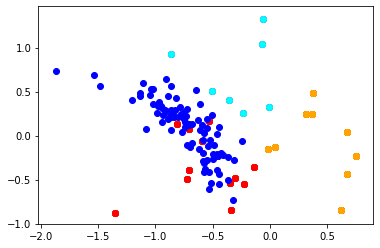

max dist  0.003239999993345976
0.0007200000017018827 0d00m00.0007s
<SkyCoord (ICRS): (ra, dec) in deg
    (150.305475, -9.0507018)> <SkyCoord (ICRS): (ra, dec) in deg
    (150.305475, -9.050702)>


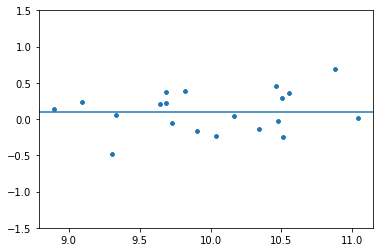

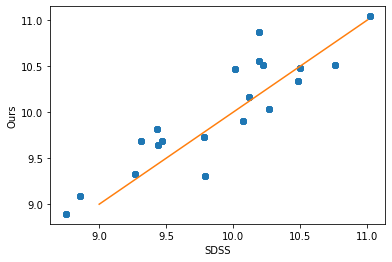

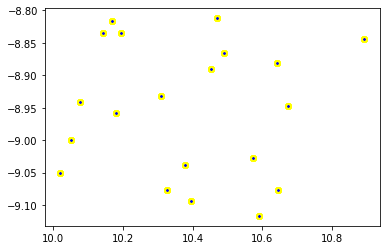

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




# SDSS data
data = np.loadtxt('/media/Data/workspace/Clusters/A85/a85metallicity/data/A85_SDSS_lines.ASC.gz', skiprows=13)
ra1 = data[:,1]
dec1 = data[:,2]
mass1 = data[:,11]
xx = np.log10(data[:,10]/data[:,9])
yy = np.log10(data[:,8]/data[:,7])
# Selection of non AGN
AGN = (yy > (0.61/(xx-0.47+0.15)+1.19)) | (xx > 0.25)
ra1 = np.array(ra1[~AGN])
dec1 = np.array(dec1[~AGN])
mass1 = np.array(mass1[~AGN])
print(np.shape(ra1))

plt.scatter(xx,yy,color='red')
plt.scatter(xx[AGN],yy[AGN],color='orange')

# Our estimates
a85 = pd.read_csv('/media/Data/workspace/Clusters/A85/a85metallicity/data/A85_MasterTable.csv')
ra2 = np.array(a85.RA)
dec2 = np.array(a85.Dec)
mass2 = np.array(a85.mass)
xx = np.log10(a85.NII/a85.Ha)
yy = np.log10(a85.OIII/a85.Hb)
# Selection of non AGN
AGN = (yy > (0.61/(xx-0.47+0.15)+1.19)) | (xx > 0.25)
ra2 = np.array(ra2[~AGN])
dec2 = np.array(dec2[~AGN])
mass2 = np.array(mass2[~AGN])
plt.scatter(xx,yy,color='blue')
plt.scatter(xx[AGN],yy[AGN],color='cyan')


plt.show()
# match and comparison
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky


sdss = SkyCoord(ra=ra1*u.hour, dec=dec1*u.degree)  
ours = SkyCoord(ra=ra2*u.hour, dec=dec2*u.degree)  
idx, d2d, d3d = sdss.match_to_catalog_sky(ours)  

print('max dist ', np.max(d2d.arcsec))
print(d2d[0].arcsec, d2d[0])
print(sdss[0], ours[idx[0]])

mediandiff = np.median(np.log10(mass2[idx]) - mass1)
plt.plot(np.log10(mass2[idx]), np.log10(mass2[idx]) - mass1,'.')
plt.ylim([-1.5,1.5])
plt.axhline(mediandiff)
plt.show()

plt.plot(mass1, np.log10(mass2[idx]), 'o')
plt.xlabel('SDSS')
plt.ylabel('Ours')
plt.plot([9,11],[9,11])
plt.show()

# Check on matching
plt.plot(ra2[idx], dec2[idx], 'o', color='yellow')
plt.plot(ra1, dec1, '.', color='blue', markersize=2)
plt.show()